In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sns
sns.set()
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [2]:
#load data
categories = os.listdir("data")
categories


['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [3]:
#creating image and label list
images = []
labels = []
for category in categories:
    directory = "data" + "/" + category + "/"
    for image_file in os.listdir(directory):
        images.append(directory + image_file)
        labels.append(category)

In [4]:
#create a data frame
images = pd.Series(images, name="Image")
labels = pd.Series(labels, name="Quality")
data = pd.concat([images, labels], axis=1)
data.head()

,Image,Quality
0,data/Blight/Corn_Blight (1).jpeg,Blight
1,data/Blight/Corn_Blight (1).jpg,Blight
2,data/Blight/Corn_Blight (10).jpg,Blight
3,data/Blight/Corn_Blight (100).jpg,Blight
4,data/Blight/Corn_Blight (1000).JPG,Blight


In [5]:
#view the last five
data.tail()

,Image,Quality
4183,data/Healthy/Corn_Health (995).jpg,Healthy
4184,data/Healthy/Corn_Health (996).jpg,Healthy
4185,data/Healthy/Corn_Health (997).jpg,Healthy
4186,data/Healthy/Corn_Health (998).jpg,Healthy
4187,data/Healthy/Corn_Health (999).jpg,Healthy


In [6]:
#shuffle the dataframe
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Image,Quality
0,data/Gray_Leaf_Spot/Corn_Gray_Spot (203).JPG,Gray_Leaf_Spot
1,data/Common_Rust/Corn_Common_Rust (692).JPG,Common_Rust
2,data/Blight/Corn_Blight (636).jpg,Blight
3,data/Healthy/Corn_Health (77).jpg,Healthy
4,data/Healthy/Corn_Health (603).jpg,Healthy


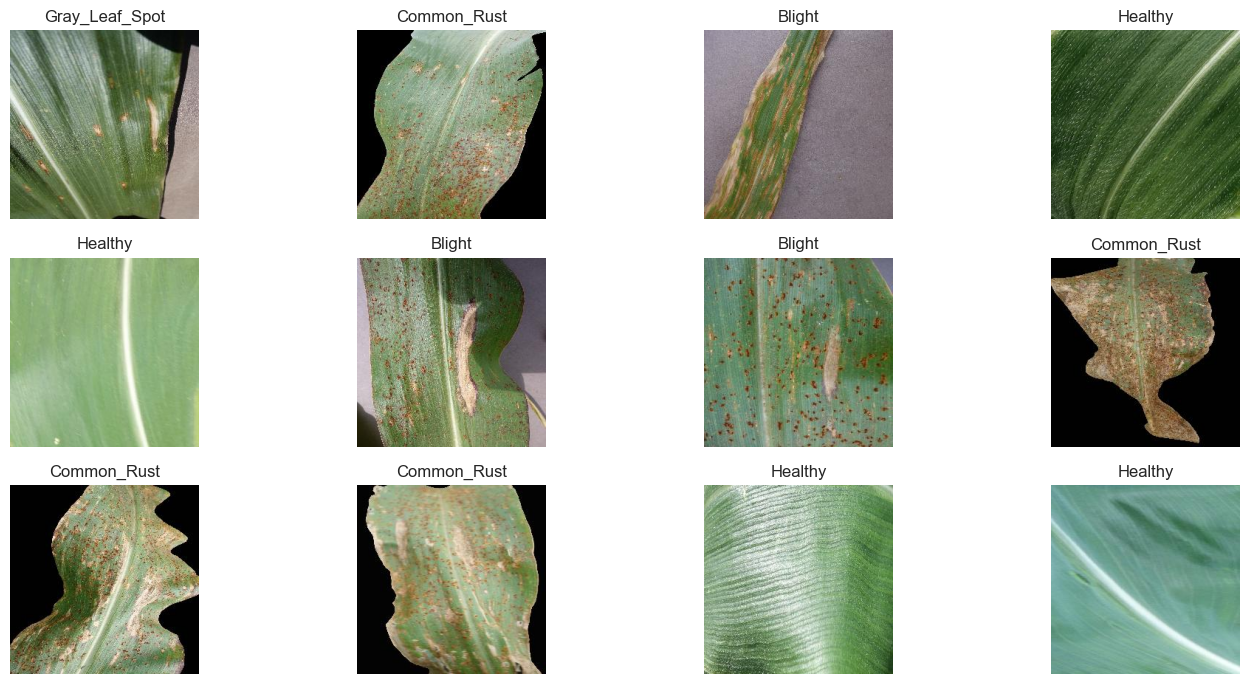

In [7]:
#display random images
fig, axes = plt.subplots(3, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(data.Image[i]))
    ax.set_title(data.Quality[i])
    ax.axis("off")

plt.tight_layout()
plt.show()

In [9]:
#train test split
train, held_out = train_test_split(
    data, 
    train_size=0.8,
    test_size=0.2, 
    stratify=data.Quality, 
    random_state=42
)

print(train.shape)
print(held_out.shape)

(3350, 2)
(838, 2)
